<a href="https://colab.research.google.com/github/vanillaay/Python-project/blob/main/MNIST_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the data**

In [ ]:
import pandas as pd
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

In [ ]:
# loading in data

train = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train["label"]

# Drop column with labels
x_train = train.drop(labels = ["label"],axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


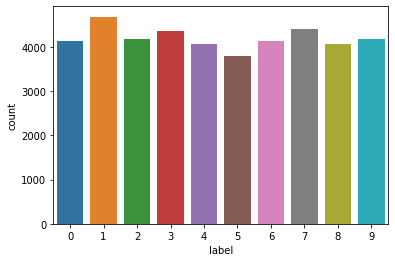

In [ ]:
label_count = sns.countplot(y_train)

**Cleaning the data**

In [ ]:
# Normalize
x_train = x_train / 255.0
test = test / 255.0

In [ ]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
# Encode
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
# Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

**Example of numbers**

(-0.5, 27.5, 27.5, -0.5)

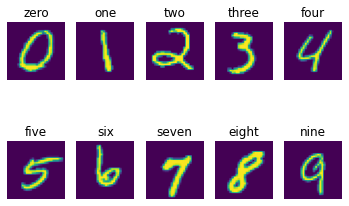

In [ ]:
# example

fig, axs = plt.subplots(2, 5)

axs[0, 0].imshow(x_train[8][:,:,0])
axs[0, 0].set_title('zero')
axs[0, 0].axis('off')

axs[0, 1].imshow(x_train[7][:,:,0])
axs[0, 1].set_title('one')
axs[0, 1].axis('off')

axs[0, 2].imshow(x_train[12][:,:,0])
axs[0, 2].set_title('two')
axs[0, 2].axis('off')

axs[0, 3].imshow(x_train[10][:,:,0])
axs[0, 3].set_title('three')
axs[0, 3].axis('off')

axs[0, 4].imshow(x_train[28][:,:,0])
axs[0, 4].set_title('four')
axs[0, 4].axis('off')


axs[1, 0].imshow(x_train[3][:,:,0])
axs[1, 0].set_title('five')
axs[1, 0].axis('off')

axs[1, 1].imshow(x_train[30][:,:,0])
axs[1, 1].set_title('six')
axs[1, 1].axis('off')

axs[1, 2].imshow(x_train[0][:,:,0])
axs[1, 2].set_title('seven')
axs[1, 2].axis('off')

axs[1, 3].imshow(x_train[21][:,:,0])
axs[1, 3].set_title('eight')
axs[1, 3].axis('off')

axs[1, 4].imshow(x_train[31][:,:,0])
axs[1, 4].set_title('nine')
axs[1, 4].axis('off')

**Creating the model**

In [ ]:
# Model
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = (5,5), activation ='relu'))
model.add(MaxPool2D(pool_size=(5,5)))

model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

In [ ]:
# Compile
model.compile(optimizer = RMSprop() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 50, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
756/756 [==============================] - 35s 8ms/step - loss: 0.4614 - accuracy: 0.8592 - val_loss: 0.0798 - val_accuracy: 0.9762
Epoch 2/50
756/756 [==============================] - 5s 7ms/step - loss: 0.0704 - accuracy: 0.9781 - val_loss: 0.0541 - val_accuracy: 0.9845
Epoch 3/50
756/756 [==============================] - 5s 7ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0499 - val_accuracy: 0.9850
Epoch 4/50
756/756 [==============================] - 5s 7ms/step - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.0584 - val_accuracy: 0.9826
Epoch 5/50
756/756 [==============================] - 5s 7ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0434 - val_accuracy: 0.9890
Epoch 6/50
756/756 [==============================] - 5s 7ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0404 - val_accuracy: 0.9900
Epoch 7/50
756/756 [==============================] - 5s 7ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0402 - val_accuracy: 0.9900
Epoch

**Visualization of model accuracy and loss**

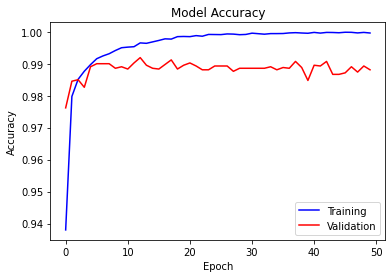

In [ ]:
plt.plot(history.history["accuracy"],"b")
plt.plot(history.history["val_accuracy"], "r")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"])
plt.show()

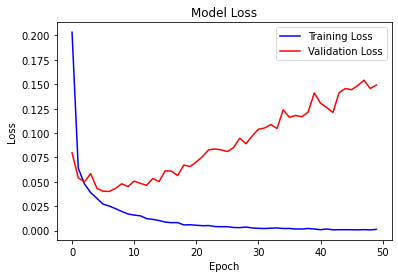

In [ ]:
plt.plot(history.history["loss"],"b")
plt.plot(history.history["val_loss"], "r")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

**Based on Validation loss we can see that the model starts overfitting. We found a great article about "How to Configure Image Data Augmentation in Keras" (https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/?fbclid=IwAR3ZcKqEyTICkXTV6Bx3EYyH87H95d3LJa3PRLnQvoiWW-x3xsYFV2npve4).**
**We decided to use that knowledge to prevent overfitting.**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)



datagen.fit(x_train)

In [ ]:
# Fit Model
batch_size = 50

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size),
                              epochs = 50, validation_data = (x_val,y_val),
                              steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/50
  9/756 [..............................] - ETA: 10s - loss: 0.0460 - accuracy: 0.9867

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


756/756 [==============================] - 11s 14ms/step - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0413 - val_accuracy: 0.9900
Epoch 2/50
756/756 [==============================] - 11s 15ms/step - loss: 0.0390 - accuracy: 0.9889 - val_loss: 0.0506 - val_accuracy: 0.9900
Epoch 3/50
756/756 [==============================] - 11s 14ms/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.0443 - val_accuracy: 0.9907
Epoch 4/50
756/756 [==============================] - 11s 14ms/step - loss: 0.0374 - accuracy: 0.9899 - val_loss: 0.0328 - val_accuracy: 0.9917
Epoch 5/50
756/756 [==============================] - 11s 15ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0416 - val_accuracy: 0.9898
Epoch 6/50
756/756 [==============================] - 11s 14ms/step - loss: 0.0357 - accuracy: 0.9898 - val_loss: 0.0393 - val_accuracy: 0.9907
Epoch 7/50
756/756 [==============================] - 11s 14ms/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 0.0485 - val_accuracy: 0.9895
Epo

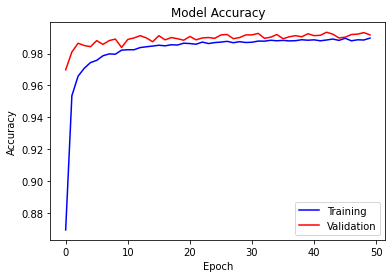

In [ ]:
plt.plot(history.history["accuracy"],"b")
plt.plot(history.history["val_accuracy"], "r")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"])
plt.show()

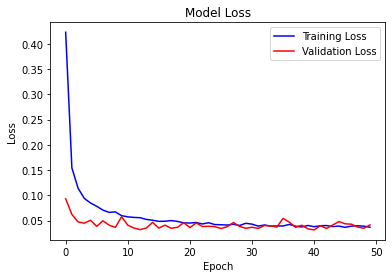

In [ ]:
plt.plot(history.history["loss"],"b")
plt.plot(history.history["val_loss"], "r")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

**As we can see now our model is not overfitting or underfitting anymore. It reached one of the optimas. We could now increase the epochs and it wouldn't overtrain. Unfortunately it will also not give us a better accuracy.
Meaning that this model reached a final accuracy of: ~99% .**

In [ ]:
from skimage import io
from skimage import transform

**Example of a number**

The prediction is:  8


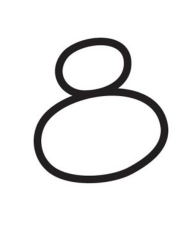

In [ ]:
#8
#plt.imshow(X_train[0][:,:,0])
test_img_8 = io.imread('/content/drive/MyDrive/MNIST/eight.jpg')
plt.imshow(test_img_8)
plt.axis("off")
test_img_8 = test_img_8 / 255.0
test_img_8 = transform.resize(test_img_8, (28,28,1))
prediction_8 = model.predict(np.array ([test_img_8,]))
print("The prediction is: ", np.argmax(prediction_8))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

**Confusion matrix**

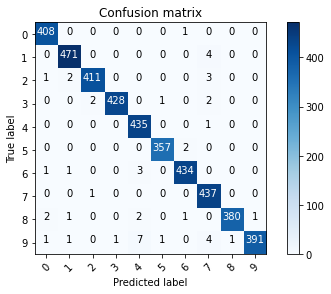

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))